# TP1

## 1. Methode d'inversion

### Exercice 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

1. 

$$\mathbb{P}(X=1) = \mathbb{P}(U \leq p) = \int_0^p du = p$$
$$\mathbb{P}(X=0) = 1 - \mathbb{P}(U \leq p) = 1-p$$

In [ ]:
# 2.

import numpy as np

def sample_bernoulli(p, N):
    res = []
    for _ in range(N):
        U = np.random.rand()
        # if U <= p:
        #     res.append(1)
        # else:
        #     res.append(0)
        res.append(int(U <= p))
    return res

In [ ]:
# 3.

N_list = [100, 1000, 10000]
p = 0.3

for N in N_list:
    print(sum(sample_bernoulli(p, N)) / N)

In [ ]:
# 4.

# (a & b)

p = 0.3
n = 40

mu = p
sigma = np.sqrt(p*(1-p))

N = 100000
Z_n_list = []

for _ in range(N):
    X_n_bar = np.mean(sum(sample_bernoulli(p, n)) / n)
    Z_n_list.append(np.sqrt(n) * (X_n_bar - mu) / sigma)

plt.hist(Z_n_list, density=True)

# N(0,1) plot
x = np.linspace(-4,4)
plt.plot(x, stats.norm.pdf(x,0,1))

### Exercice 2

In [ ]:
# 2.

def sample_binomial(n, p, N):
    res = []
    for _ in range(N):
        s = 0
        for _ in range(n):
            U = np.random.rand()
            s += int(U <= p)
        res.append(s)
    return res

In [ ]:
# 3.

N = 10000
n = 30
p = 0.1

sample_binomial_list = sample_binomial(n, p, N)
plt.hist(sample_binomial_list)

In [ ]:
# 4.

y_axis = [sum(list(map(int, [X == k for X in sample_binomial_list])))/N
          for k in range(n+1)]

plt.plot([x for x in range(n+1)], y_axis)

In [ ]:
# 5.



### Exercice 3

In [ ]:
# 1.

a_list = [0.5, 1, 1.5, 2]
p_list = [1/4, 1/8, 1/8, 1/2]

c_list = [sum(p_list[0:(i+1)]) for i in range(len(p_list))]

N = 10000

res = []

# algo from slide 1 page 23
for _ in range(N):
    k = 0
    U = np.random.rand()
    while (U > c_list[k] and k < len(p_list)):
        k += 1
    res.append(a_list[k])

plt.hist(res)

In [ ]:
# 2.

plt.plot([1,2,3,4], [1/4, 1/8, 1/8, 1/2])

### Exercice 4

In [ ]:
# 1.



## 2. Methodes de rejet et de transformation

### Exercice 6

In [75]:
# 3.

def sample_abs_std_normal(N):
    res = []

    f = lambda x : 2 / np.sqrt(2*np.pi) * np.exp(-x**2/2) * int(x>0)
    g = lambda x : np.exp(-x) * int(x>0)
    inv_cdf_g = lambda x : -np.log(1-x) * int(x>0 and x<1)
    c = np.sqrt(2 * np.e / np.pi)

    for _ in range(N):
        while True:
            U = np.random.rand()
            Y = inv_cdf_g(U)
            if U < f(Y) / (c * g(Y)):
                break
        res.append(Y)
    
    return res

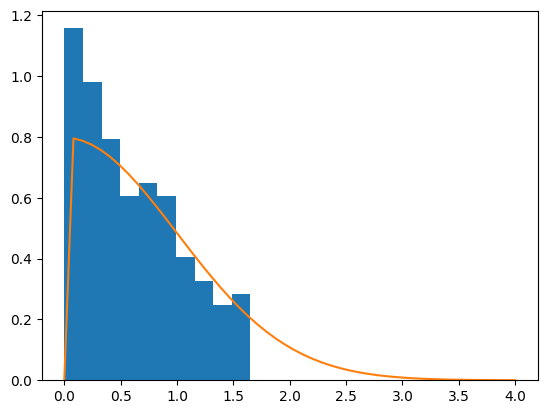

In [81]:
# 4.

N = 100000

plt.hist(sample_abs_std_normal(1000), density=True)

# |X| plot
x = np.linspace(0,4)
f = lambda x : 2 / np.sqrt(2*np.pi) * np.exp(-x**2/2) * int(x>0)
plt.plot(x, list(map(f, x)))

In [ ]:
# Test if inverse cdf of g is correct

g = lambda x : np.exp(-x)
inv_cdf_g = lambda x : -np.log(1-x)

plt.hist([inv_cdf_g(np.random.rand()) for _ in range(1000)], density=True)

x = np.linspace(0,6)
plt.plot(x, list(map(g,x)))